<a href="https://colab.research.google.com/github/RTae/Data-science-essentials/blob/master/week4/DSE_trend_forecast_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Time Series

In [ ]:
# download airline-passengers.csv
!gdown --id 1aTOylhzPyQi-kgAjj2RQeran829yFRkz

Downloading...
From: https://drive.google.com/uc?id=1aTOylhzPyQi-kgAjj2RQeran829yFRkz
To: /content/airline-passengers.csv
100% 2.18k/2.18k [00:00<00:00, 3.13MB/s]


In [ ]:
# import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
%config InlineBackend.figure_format = 'svg' # Plot image with vector

# load dataframe
df = pd.read_csv('airline-passengers.csv')
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
# Stat data
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
df = df.set_index('Month')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


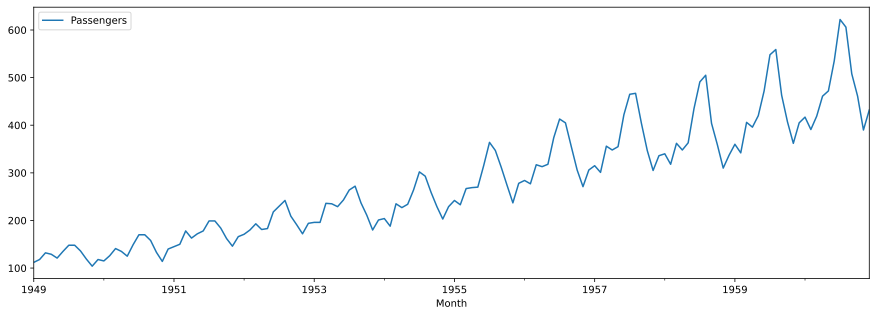

In [ ]:
# Visualize
df.plot(figsize=(15,5));

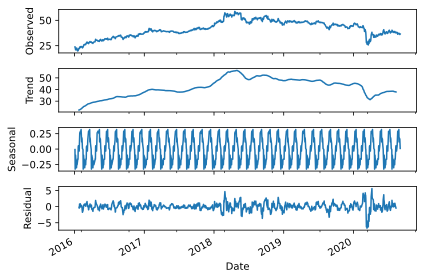

In [ ]:
# decompose trend, seasonal, and residual
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df, model='additive')

decompose.plot();

In [ ]:
!gdown --id 109sv8ScAZESENZajhbgLAa45rfJASRIT

Downloading...
From: https://drive.google.com/uc?id=109sv8ScAZESENZajhbgLAa45rfJASRIT
To: /content/rubber-300.csv
100% 4.82k/4.82k [00:00<00:00, 9.69MB/s]


In [ ]:
# import rubber price
import pandas as pd
import matplotlib.pyplot as plt

rub_df = pd.read_csv('rubber-300.csv')
rub_df.head()

,Month,Price
0,Jul 1995,32.90
1,Aug 1995,32.43
2,Sep 1995,33.92
3,Oct 1995,35.40
4,Nov 1995,40.51


In [ ]:
rub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   301 non-null    object 
 1   Price   301 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.8+ KB


In [ ]:
rub_df['Month'] = pd.to_datetime(rub_df['Month'])
rub_df = rub_df.set_index('Month')
rub_df

,Price
Month,
1995-07-01,32.90
1995-08-01,32.43
1995-09-01,33.92
1995-10-01,35.40
1995-11-01,40.51
...,...
2020-03-01,48.16
2020-04-01,43.39
2020-05-01,43.26


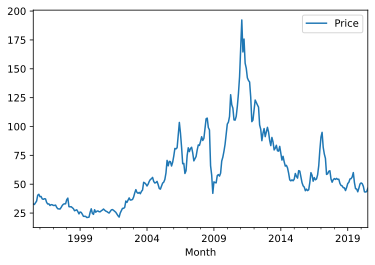

In [ ]:
# visualize
rub_df.plot();

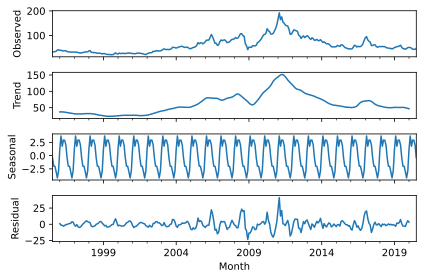

In [ ]:
# decompose trend, seasonal, and residual
from statsmodels.tsa.seasonal import seasonal_decompose

rub_decom = seasonal_decompose(rub_df, model='additive')

rub_decom.plot();



--- END ---



# Forecasting Time Series: Concept and Real Example

## ติดตั้งไลบรารี่ ```starfishX``` [starfishX](https://pypi.org/project/starfishX/)  เพื่อดึงข้อมูลตลาดหุ้น

In [ ]:
%%capture
!pip install starfishX

# Import all necessary packages
import starfishX as sx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
pd.options.display.float_format = '{:,.2f}'.format

# Work flow
1. Get data
2. Cleansing & transformation: 
    
    2.1. extract feature and label

    2.2. one hot

    2.3. train-test split

3. Prediction model
4. Visualize
5. Feature engineer
6. Setup pipeline

## 1. Get data


### ใช้ฟังก์ชั่น ```getFinanceRatio()``` เพื่อดึงข้อมูลทางการเงินของหุ้นที่สนใจ

ถ้าใส่หุ้นตัวเดียวจะได้สัดส่วนทางการเงินย้อนหลัง 4 ช่วงเวลา ถ้าใส่ list ของรายชื่อหุ้น จะได้สัดส่วนทางการเงินล่าสุดของหุ้นที่อยู่ใน list

In [ ]:
# Create get_stock function to pull stock data
def get_stock(stock, startdate='2016-01-01'):

  df = sx.loadHistData(stock, start=startdate,
                      OHLC=True, Volume=True)
  
  return df

In [ ]:
stock_symbol = 'PTT'
start_date = '2016-01-01'
df = get_stock(stock=stock_symbol, startdate=start_date)
df.shape

(1140, 5)

In [ ]:
# Display dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2016-01-04 to 2020-09-02
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   OPEN    1140 non-null   float64
 1   HIGH    1140 non-null   float64
 2   LOW     1140 non-null   float64
 3   CLOSE   1140 non-null   float64
 4   VOLUME  1140 non-null   float64
dtypes: float64(5)
memory usage: 53.4 KB


In [ ]:
# Display stock price statistic information
df.describe()

,OPEN,HIGH,LOW,CLOSE,VOLUME
count,"1,140.00","1,140.00","1,140.00","1,140.00","1,140.00"
mean,41.60,42.00,41.19,41.58,"66,377,639.04"
std,7.99,8.01,7.94,7.97,"48,310,290.75"
min,19.90,20.20,19.70,19.80,0.00
25%,36.50,36.75,36.00,36.40,"38,793,750.00"
50%,41.77,42.00,41.40,41.67,"52,969,100.00"
75%,48.00,48.50,47.75,48.00,"78,682,750.00"
max,58.60,59.50,57.60,58.80,"643,782,000.00"


In [ ]:
df.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,
2016-01-04,24.80,25.00,23.80,23.80,"57,964,000.00"
2016-01-05,23.90,24.10,22.50,22.70,"88,229,000.00"
2016-01-06,22.50,22.90,22.20,22.80,"65,320,000.00"
2016-01-07,21.50,21.60,20.60,20.90,"182,186,000.00"
2016-01-08,21.30,21.70,20.90,21.50,"108,961,000.00"


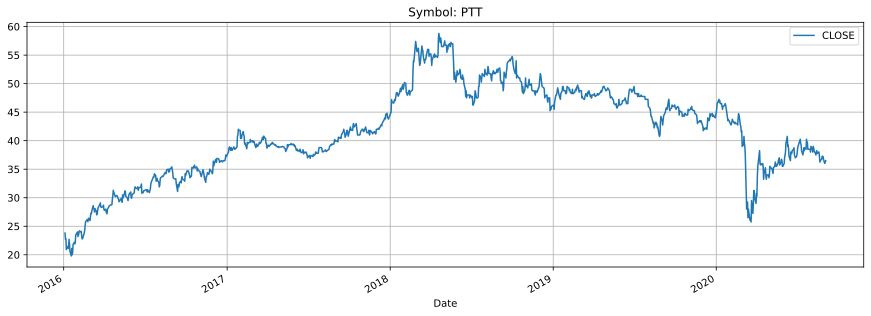

In [ ]:
# A quick look at stock price
df.CLOSE.plot(figsize=(15,5))
plt.title('Symbol: {}'.format(stock_symbol))
plt.grid()
plt.legend();

## 2. Cleansing & transformation

### 2.1. Get feature and target dataframe

In [ ]:
df.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,
2016-01-04,24.80,25.00,23.80,23.80,"57,964,000.00"
2016-01-05,23.90,24.10,22.50,22.70,"88,229,000.00"
2016-01-06,22.50,22.90,22.20,22.80,"65,320,000.00"
2016-01-07,21.50,21.60,20.60,20.90,"182,186,000.00"
2016-01-08,21.30,21.70,20.90,21.50,"108,961,000.00"


In [ ]:
# Create get_X_y function to get dependent (y) and independent (X) variables
def get_X_y(dataframe):
  
  # Extract time series variable
  X = dataframe.reset_index()[['Date']]
  X['Year'] = [X.iloc[i, 0].year for i in range(len(X))]
  X['Month'] = [X.iloc[i, 0].month for i in range(len(X))]
  X['Day'] = [X.iloc[i, 0].day for i in range(len(X))]
  X['EnglishDay'] = X.Date.dt.strftime('%a')

  # Set categorical variable
  X = X.astype({'Month':'category', 
                'Day':'category', 
                'EnglishDay':'category'}).set_index('Date')

  # Get OHLC
  X = X.merge(dataframe, left_index=True, right_index=True)

  # Extract dependent variable
  y = dataframe[['CLOSE']].copy()
  
  return X, y

In [ ]:
# Test get_X_y function
X, y = get_X_y(df)

# Display 10 rows of X
X.head()

,Year,Month,Day,EnglishDay,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,,,,,
2016-01-04,2016,1,4,Mon,24.80,25.00,23.80,23.80,"57,964,000.00"
2016-01-05,2016,1,5,Tue,23.90,24.10,22.50,22.70,"88,229,000.00"
2016-01-06,2016,1,6,Wed,22.50,22.90,22.20,22.80,"65,320,000.00"
2016-01-07,2016,1,7,Thu,21.50,21.60,20.60,20.90,"182,186,000.00"
2016-01-08,2016,1,8,Fri,21.30,21.70,20.90,21.50,"108,961,000.00"


In [ ]:
# Display information of X
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2016-01-04 to 2020-09-02
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        1140 non-null   int64   
 1   Month       1140 non-null   category
 2   Day         1140 non-null   category
 3   EnglishDay  1140 non-null   category
 4   OPEN        1140 non-null   float64 
 5   HIGH        1140 non-null   float64 
 6   LOW         1140 non-null   float64 
 7   CLOSE       1140 non-null   float64 
 8   VOLUME      1140 non-null   float64 
dtypes: category(3), float64(5), int64(1)
memory usage: 107.8 KB


In [ ]:
# Display 10 rows of y
y.head()

,CLOSE
Date,
2016-01-04,23.80
2016-01-05,22.70
2016-01-06,22.80
2016-01-07,20.90
2016-01-08,21.50


In [ ]:
# Display information of y
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1140 entries, 2016-01-04 to 2020-09-02
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOSE   1140 non-null   float64
dtypes: float64(1)
memory usage: 17.8 KB


### 2.2. Get one-hot encoder

In [ ]:
# Create one_hot_encoder function
def one_hot_encoder(dataframe):

  # Select category columns
  cat_df = dataframe.select_dtypes(include=['category']).columns.to_list()

  # Convert to one-hot dataframe
  one_hot_df = pd.get_dummies(dataframe, columns=cat_df)
  
  return one_hot_df

In [ ]:
X_dummie = one_hot_encoder(X)
X_dummie

,Year,OPEN,HIGH,LOW,CLOSE,VOLUME,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,EnglishDay_Fri,EnglishDay_Mon,EnglishDay_Thu,EnglishDay_Tue,EnglishDay_Wed
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,2016,24.80,25.00,23.80,23.80,"57,964,000.00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-05,2016,23.90,24.10,22.50,22.70,"88,229,000.00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2016-01-06,2016,22.50,22.90,22.20,22.80,"65,320,000.00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-01-07,2016,21.50,21.60,20.60,20.90,"182,186,000.00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-01-08,2016,21.30,21.70,20.90,21.50,"108,961,000.00",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,2020,37.25,38.00,37.00,37.25,"66,120,700.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2020-08-28,2020,37.50,37.75,36.50,36.75,"60,845,600.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2020-08-31,2020,36.75,37.25,36.00,36.00,"58,945,200.00",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


### 2.3. Split train and test dataframe

In [ ]:
# Create stock_train_test_split function
def stock_train_test_split(dataframe, y, trainsize=0.8):

  import math

  train_ratio = trainsize
  train_size = math.ceil(len(dataframe) * train_ratio)

  # Get train dataframe
  X_train = dataframe.iloc[:train_size, :]
  y_train = y.iloc[:train_size, :]

  # Get train dataframe
  # X_test = dataframe.iloc[train_size:, :]
  X_test = dataframe.copy()
  y_test = y.iloc[train_size:, :]

  # Drop label from independent variable
  col_drop = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
  X_train = X_train.drop(col_drop, axis=1)
  X_test = X_test.drop(col_drop, axis=1)
  
  return X_train, X_test, y_train, y_test

In [ ]:
# Test stock_train_tes_split function
trainsize = 0.8
X_train, X_test, y_train, y_test = stock_train_test_split(X_dummie, y, trainsize=trainsize)

In [ ]:
# Display 10 rows of X_train
# len(X_train)
display(len(X_train))
X_train.head()

912

,Year,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,EnglishDay_Fri,EnglishDay_Mon,EnglishDay_Thu,EnglishDay_Tue,EnglishDay_Wed
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-05,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2016-01-06,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-01-07,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-01-08,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
X_train.tail()

,Year,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,EnglishDay_Fri,EnglishDay_Mon,EnglishDay_Thu,EnglishDay_Tue,EnglishDay_Wed
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-09-20,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2019-09-23,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2019-09-24,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
2019-09-25,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2019-09-26,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Display 10 rows of X_test
display(len(X_test))
X_test.head()

1140

,Year,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,EnglishDay_Fri,EnglishDay_Mon,EnglishDay_Thu,EnglishDay_Tue,EnglishDay_Wed
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-04,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2016-01-05,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2016-01-06,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2016-01-07,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2016-01-08,2016,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Display 10 rows of y_train
y_train.tail()

,CLOSE
Date,
2019-09-20,45.50
2019-09-23,45.75
2019-09-24,46.25
2019-09-25,46.00
2019-09-26,46.00


In [ ]:
# Display 10 rows of y_test
y_test.head()

,CLOSE
Date,
2019-09-27,46.00
2019-09-30,46.25
2019-10-01,45.75
2019-10-02,45.75
2019-10-03,45.50


## 3. Prediction model

### 3.1. Model

In [ ]:
# Create model_fit function for setting prediction model
def model_fit(X_train, y_train):

  # import sci-kit learn
  from sklearn.linear_model import LinearRegression

  # Model fitting with normalization
  model = LinearRegression(normalize=True).fit(X_train, y_train)
  
  return model

In [ ]:
# Train model with X_train and y_train
model = model_fit(X_train, y_train)

In [ ]:
# Test set prediction
y_hat = model.predict(X_test)

In [ ]:
y_hat[:10]

array([[30.25 ],
       [32.25 ],
       [31.625],
       [31.5  ],
       [31.625],
       [31.75 ],
       [30.25 ],
       [31.375],
       [31.   ],
       [31.5  ]])

In [ ]:
y_train.head()

,CLOSE
Date,
2016-01-04,23.80
2016-01-05,22.70
2016-01-06,22.80
2016-01-07,20.90
2016-01-08,21.50


### 3.2. Error

In [ ]:
def rmse(y_test, y_hat):
  # Root mean squared error
  from sklearn.metrics import mean_squared_error
  from math import sqrt

  y_hat_test = y_hat[-len(y_test):]
  rms = sqrt(mean_squared_error(y_test, y_hat_test))
  return print('RMS = {}'.format(rms))

In [ ]:
# rms for test dataframe
rmse(y_test, y_hat)

RMS = 18.176441293391434


## 4. Visualization

In [ ]:
# Create visualize function to display result
def visualize(X, y, y_hat, symbol, feat_eng=False):

  # Set figure size
  plt.figure(figsize=(10, 5))

  # Plot actual price
  plt.plot(X.index, y, label='Actual Price')

  # Plot predicted price
  plt.plot(X.index, y_hat, label='Predicted Price')

  # Set title
  plt.title('Stock price: {} [{}]'.format(symbol, feat_eng) )

  # Set x-label
  plt.xlabel('Period')

  # Set y-label
  plt.ylabel('Price [THB]')

  # Plot grid
  plt.grid()

  # Display legend
  plt.legend()

  # Display graph
  plt.show()

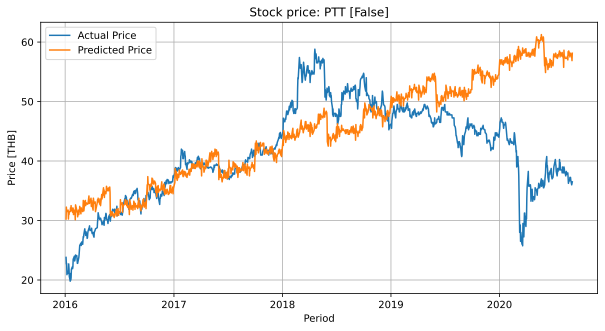

In [ ]:
visualize(X, y, y_hat, stock_symbol)

## 5. Feature engineer: Incorporate previous day price and volume features

In [ ]:
# Create feature_engineer function to extract new features
def feature_engineer(dataframe, feat_eng=False):

  if feat_eng:
    # Create a feature from previous day HIGH
    dataframe['PreviousDayHigh'] = dataframe[['HIGH']].shift(periods=1, 
                                                             fill_value=0)

    # Create a feature from previous day LOW
    dataframe['PreviousDayLow'] = dataframe[['LOW']].shift(periods=1, 
                                                           fill_value=0)

    # Create a feature from previous day VOLUME
    dataframe['PreviousDayVolume'] = dataframe[['VOLUME']].shift(periods=1, 
                                                                 fill_value=0)
  
  # Drop unused columns
  # dataframe = dataframe.drop(['HIGH', 'LOW', 'VOLUME', 'OPEN', 'CLOSE'], 
  #                            axis=1)

  return dataframe

In [ ]:
# Test our feature_engineer function
X_engineered = feature_engineer(X, feat_eng=True)
X_engineered

,Year,Month,Day,EnglishDay,OPEN,HIGH,LOW,CLOSE,VOLUME,PreviousDayHigh,PreviousDayLow,PreviousDayVolume
Date,,,,,,,,,,,,
2016-01-04,2016,1,4,Mon,24.80,25.00,23.80,23.80,"57,964,000.00",0.00,0.00,0.00
2016-01-05,2016,1,5,Tue,23.90,24.10,22.50,22.70,"88,229,000.00",25.00,23.80,"57,964,000.00"
2016-01-06,2016,1,6,Wed,22.50,22.90,22.20,22.80,"65,320,000.00",24.10,22.50,"88,229,000.00"
2016-01-07,2016,1,7,Thu,21.50,21.60,20.60,20.90,"182,186,000.00",22.90,22.20,"65,320,000.00"
2016-01-08,2016,1,8,Fri,21.30,21.70,20.90,21.50,"108,961,000.00",21.60,20.60,"182,186,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-27,2020,8,27,Thu,37.25,38.00,37.00,37.25,"66,120,700.00",37.50,36.75,"32,468,600.00"
2020-08-28,2020,8,28,Fri,37.50,37.75,36.50,36.75,"60,845,600.00",38.00,37.00,"66,120,700.00"
2020-08-31,2020,8,31,Mon,36.75,37.25,36.00,36.00,"58,945,200.00",37.75,36.50,"60,845,600.00"


## 6. Setup our pipeline

In [ ]:
# Create main function to run pipeline
def main(stock, startdate='2016-01-01', feat_eng=True):

  # Get stock
  df = get_stock(stock, startdate)

  # Get dependent and independent variables
  X, y = get_X_y(df)
  
  # Get engineered features
  X_engineered = feature_engineer(X, feat_eng=feat_eng)
  
  # One-hot encoder
  X_eng_dummie = one_hot_encoder(X_engineered)
  
  # Train test splitting
  X_train, X_test, y_train, y_test = stock_train_test_split(X_eng_dummie, 
                                                            y, 
                                                            trainsize=0.8)
  

  # Drop ground truth
  col_drop = ['OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME']
  X_eng_dummie = X_eng_dummie.drop(col_drop, axis=1)

  # Prediction model
  model = model_fit(X_train, y_train)

  # Prediction
  y_hat = model.predict(X_eng_dummie)

  # RMS
  rmse(y_test, y_hat)

  # Visualize output
  visualize(X, y, y_hat, stock, feat_eng=feat_eng)

  return y_test, y_hat

## Test our pipeline

RMS = 0.47299980079406706


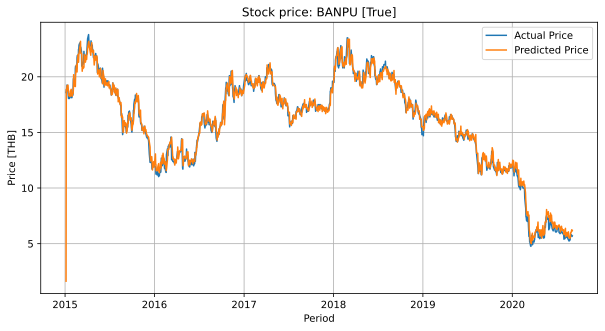

In [ ]:
# Set all parameters
stock_symbol = 'BANPU'
start_date = '2015-01-01'
feat_eng = True

# Call main function with parsing parameters
y_test, y_hat = main(stock=stock_symbol, startdate=start_date, feat_eng=feat_eng)



---



---



# Extras

In [ ]:
# display income statement
sx.getIncomeStatement('ADVANC')

,6M/2563(01/01/63-30/06/63),6M/2562(01/01/62-30/06/62),2562(01/01/62-31/12/62),2561(01/01/61-31/12/61),2560(01/01/60-31/12/60)
งบกำไรขาดทุนเบ็ดเสร็จ(ลบ.),,,,,
ยอดขายสุทธิ,"85,101.29","87,343.10","180,893.69","169,855.85","157,721.80"
รายได้อื่น,640.76,416.46,846.50,979.46,750.00
รวมรายได้,"85,742.04","87,718.94","181,654.32","170,835.31","158,477.17"
ต้นทุนขาย,"53,524.32","53,854.83","111,899.44","103,455.69","92,258.64"
ค่าใช้จ่ายในการขายและบริหาร,"12,298.82","13,309.37","27,740.55","26,294.84","25,077.73"
รวมค่าใช้จ่าย,"66,128.80","66,909.88","139,475.95","130,050.98","117,254.18"
EBITDA,"45,481.81","38,707.92","79,407.19","74,663.42","71,373.68"
ค่าเสื่อมและค่าตัดจำหน่าย,"25,868.57","17,898.86","37,228.82","33,879.09","30,150.70"
กำไรก่อนด/บ และภาษีเงินได้,"19,613.24","20,809.06","42,178.37","40,784.33","41,222.98"


In [ ]:
# display financial ratio
sx.getFinanceRatio('ADVANC')

,6M/2020,6M/2019,2019,2018
Ratios,,,,
Current Ratio (X),0.45,0.56,0.45,0.48
ROE (%),43.57,48.22,49.20,55.05
ROA (%),12.50,13.91,14.54,14.20
D/E (X),4.14,3.46,3.18,4.05
Total Asset Turnover (X),0.55,0.61,0.63,0.59
Gross Profit Margin (%),37.11,38.34,38.14,39.09
EBIT Margin (%),22.87,23.72,23.22,23.87
Net Profit Margin (%),16.04,17.47,17.17,17.37


In [ ]:
# compare financial ratio
sx.getFinanceRatio(['ADVANC', 'PTT', 'SCG'])

,ADVANC.6M/2020,PTT.6M/2020,SCG.6M/2020
Ratios,,,
Current Ratio (X),0.45,2.39,0.43
ROE (%),43.57,5.55,3.18
ROA (%),12.50,4.22,3.47
D/E (X),4.14,1.37,1.58
Total Asset Turnover (X),0.55,0.81,0.62
Gross Profit Margin (%),37.11,6.75,7.98
EBIT Margin (%),22.87,2.89,5.15
Net Profit Margin (%),16.04,1.25,1.52


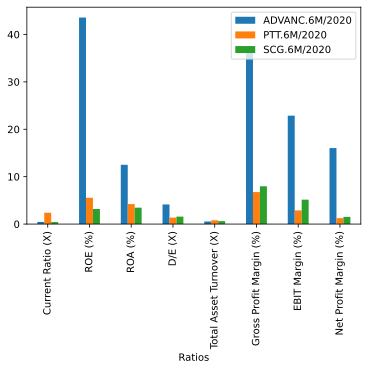

In [ ]:
# visualize financial ratio
sx.getFinanceRatio(['ADVANC', 'PTT', 'SCG']).plot.bar();

In [ ]:
# get income statement
incomeStatement = sx.getIncomeStatement('ADVANC')
incomeStatement.columns

Index(['6M/2563(01/01/63-30/06/63)', '6M/2562(01/01/62-30/06/62)',
       '2562(01/01/62-31/12/62)', '2561(01/01/61-31/12/61)',
       '2560(01/01/60-31/12/60)'],
      dtype='object')

In [ ]:
incomeStatement

,6M/2563(01/01/63-30/06/63),6M/2562(01/01/62-30/06/62),2562(01/01/62-31/12/62),2561(01/01/61-31/12/61),2560(01/01/60-31/12/60)
งบกำไรขาดทุนเบ็ดเสร็จ(ลบ.),,,,,
ยอดขายสุทธิ,"85,101.29","87,343.10","180,893.69","169,855.85","157,721.80"
รายได้อื่น,640.76,416.46,846.50,979.46,750.00
รวมรายได้,"85,742.04","87,718.94","181,654.32","170,835.31","158,477.17"
ต้นทุนขาย,"53,524.32","53,854.83","111,899.44","103,455.69","92,258.64"
ค่าใช้จ่ายในการขายและบริหาร,"12,298.82","13,309.37","27,740.55","26,294.84","25,077.73"
รวมค่าใช้จ่าย,"66,128.80","66,909.88","139,475.95","130,050.98","117,254.18"
EBITDA,"45,481.81","38,707.92","79,407.19","74,663.42","71,373.68"
ค่าเสื่อมและค่าตัดจำหน่าย,"25,868.57","17,898.86","37,228.82","33,879.09","30,150.70"
กำไรก่อนด/บ และภาษีเงินได้,"19,613.24","20,809.06","42,178.37","40,784.33","41,222.98"


In [ ]:
type(incomeStatement.iloc[0,0])

str

In [ ]:
incomeStatement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, ยอดขายสุทธิ to กำไรต่อหุ้น (บาท)
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   6M/2563(01/01/63-30/06/63)  11 non-null     object
 1   6M/2562(01/01/62-30/06/62)  11 non-null     object
 2   2562(01/01/62-31/12/62)     11 non-null     object
 3   2561(01/01/61-31/12/61)     11 non-null     object
 4   2560(01/01/60-31/12/60)     11 non-null     object
dtypes: object(5)
memory usage: 848.0+ bytes


In [ ]:
# Check dtype of dataframe
type(incomeStatement.iloc[0,0])

str

In [ ]:
# Convert string object into float64
income_col = incomeStatement.columns
for i in income_col:
  incomeStatement[i] = incomeStatement[i].str.replace(',', '').astype(float)
incomeStatement.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, ยอดขายสุทธิ to กำไรต่อหุ้น (บาท)
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   6M/2563(01/01/63-30/06/63)  11 non-null     float64
 1   6M/2562(01/01/62-30/06/62)  11 non-null     float64
 2   2562(01/01/62-31/12/62)     11 non-null     float64
 3   2561(01/01/61-31/12/61)     11 non-null     float64
 4   2560(01/01/60-31/12/60)     11 non-null     float64
dtypes: float64(5)
memory usage: 848.0+ bytes


In [ ]:
# Import Thai Font for plotting
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

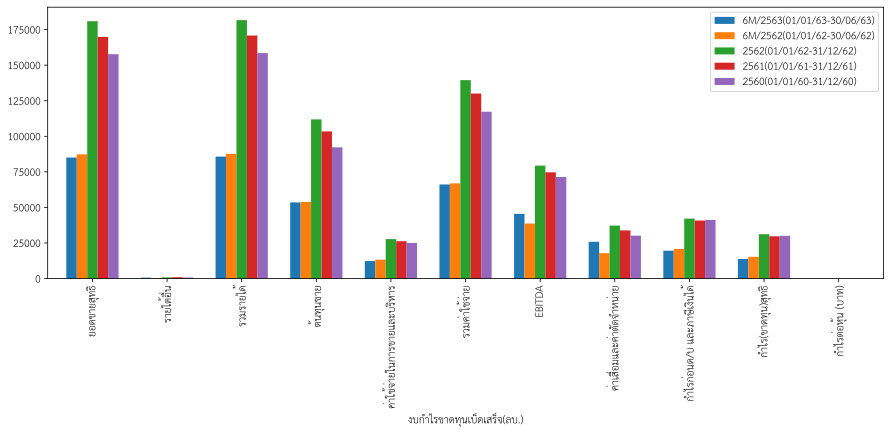

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)
incomeStatement.plot.bar(width=0.7);

In [ ]:
from sklearn import preprocessing

x = incomeStatement.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_income = pd.DataFrame(x_scaled, index=incomeStatement.index, columns=income_col)

In [ ]:
norm_income

,6M/2563(01/01/63-30/06/63),6M/2562(01/01/62-30/06/62),2562(01/01/62-31/12/62),2561(01/01/61-31/12/61),2560(01/01/60-31/12/60)
งบกำไรขาดทุนเบ็ดเสร็จ(ลบ.),,,,,
ยอดขายสุทธิ,0.99,1.00,1.00,0.99,1.00
รายได้อื่น,0.01,0.00,0.00,0.01,0.00
รวมรายได้,1.00,1.00,1.00,1.00,1.00
ต้นทุนขาย,0.62,0.61,0.62,0.61,0.58
ค่าใช้จ่ายในการขายและบริหาร,0.14,0.15,0.15,0.15,0.16
รวมค่าใช้จ่าย,0.77,0.76,0.77,0.76,0.74
EBITDA,0.53,0.44,0.44,0.44,0.45
ค่าเสื่อมและค่าตัดจำหน่าย,0.30,0.20,0.20,0.20,0.19
กำไรก่อนด/บ และภาษีเงินได้,0.23,0.24,0.23,0.24,0.26


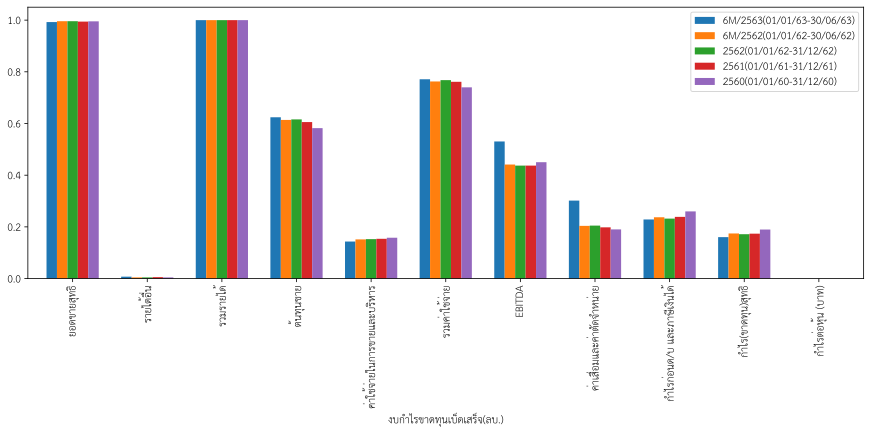

In [ ]:
norm_income.plot.bar(width=0.7);

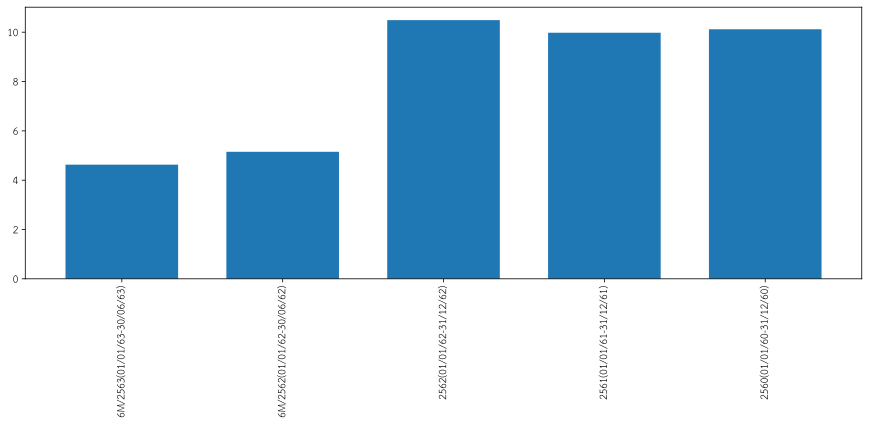

In [ ]:
# plt.rcParams["figure.figsize"] = (15, 6)
incomeStatement.loc['กำไรต่อหุ้น (บาท)', :].plot.bar(width=0.7);

In [ ]:
# sx.getFundamentalInSector("advanc")

In [ ]:
# sx.DuPontROE('ADVANC',2561,firstLine=False)

In [ ]:
# sx.spiderCompare(['ADVANC','PTT'])

--- END ---

# Pycaret: https://pycaret.org/

In [ ]:
%%capture
!pip install pycaret==2.0

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [ ]:
# get toy dataset
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
#check the shape of data
dataset.shape

(6000, 8)

In [ ]:
# split train&test dataset
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


In [ ]:
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.50,Good,E,VS2,VG,G,GIA,12702
1,1.08,Ideal,D,VS2,EX,EX,GIA,8481
2,2.25,Good,I,VS2,G,VG,GIA,18623
3,2.27,Very Good,G,VS2,VG,VG,GIA,27252
4,1.20,Ideal,F,VS1,EX,EX,GIA,9641


In [ ]:
# setup train and test dataframe for pycaret
# data is train dataset, target is lable
# session_id is a random seed
from pycaret.regression import *
exp_reg101 = setup(data = data, target = 'Price', session_id=123)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(5400, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [ ]:
# ransac = random sample consensus
best = compare_models()#blacklist = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,CatBoost Regressor,626.8852,2167206.4646,1393.4210,0.9797,0.0671,0.0490,1.4094
1,Extra Trees Regressor,755.9566,2756642.5198,1604.2591,0.9732,0.0819,0.0607,1.1353
2,Light Gradient Boosting Machine,752.2357,3055569.4004,1687.7770,0.9711,0.0773,0.0567,0.0820
3,Random Forest,762.0579,2969421.3714,1671.9701,0.9711,0.0817,0.0597,1.0479
4,Extreme Gradient Boosting,932.7974,3534049.4485,1855.3299,0.9652,0.1061,0.0801,0.2679
5,Gradient Boosting Regressor,919.7893,3751333.9600,1898.2498,0.9634,0.1024,0.0770,0.3319
6,Decision Tree,998.2558,5292680.3084,2225.8934,0.9479,0.1078,0.0773,0.0209
7,Ridge Regression,2413.5865,14120531.3503,3726.1698,0.8621,0.6689,0.2875,0.0046
8,Lasso Regression,2412.1923,14246796.4091,3744.2303,0.8608,0.6767,0.2866,0.0763
9,Least Angle Regression,2413.7845,14243369.7467,3744.1671,0.8607,0.6629,0.2870,0.0111


In [ ]:
# List all available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model.Lasso,True
ridge,Ridge Regression,sklearn.linear_model.Ridge,True
en,Elastic Net,sklearn.linear_model.ElasticNet,True
lar,Least Angle Regression,sklearn.linear_model.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model.OMP,True
br,Bayesian Ridge,sklearn.linear_model.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model.ARDRegression,False


In [ ]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2424.5132,12784575.4127,3575.5525,0.8596,0.5235,0.2670
1,2579.2381,23433444.1058,4840.8103,0.8204,0.7194,0.2840
2,2436.4101,16146597.9021,4018.2830,0.8519,0.6800,0.2958
3,2332.6931,10702351.5503,3271.4449,0.8819,0.7225,0.2742
4,2551.9577,10766073.9418,3281.1696,0.8657,0.8336,0.3517
5,2455.4153,16825691.8862,4101.9132,0.8564,0.6240,0.2841
6,2277.6679,12717888.7818,3566.2149,0.8805,0.6736,0.2640
7,2389.6799,11498759.6958,3390.9821,0.8546,0.7204,0.2935
8,2573.4339,14015721.9418,3743.7577,0.8624,1.0215,0.2996
9,2446.3793,16241361.5146,4030.0573,0.8453,0.8084,0.2991


In [ ]:
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)


In [ ]:
tuned_lr = tune_model(lr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2381.4735,12259242.6627,3501.3201,0.8654,0.4707,0.2594
1,2590.6984,23400974.5185,4837.4554,0.8207,0.5653,0.2913
2,2508.5370,16311952.8228,4038.8059,0.8504,0.7053,0.3165
3,2325.5079,10691313.9312,3269.7575,0.8820,0.7709,0.2742
4,2455.6425,10184575.5839,3191.3282,0.8730,0.6320,0.3353
5,2454.4769,16825774.1083,4101.9232,0.8564,0.6185,0.2840
6,2277.6679,12717888.7818,3566.2149,0.8805,0.6736,0.2640
7,2382.6416,11467436.4539,3386.3604,0.8550,0.6893,0.2931
8,2379.8373,12646487.1448,3556.1900,0.8758,0.7497,0.2741
9,2445.7594,16185036.0616,4023.0630,0.8459,0.8371,0.2989


In [ ]:
print(tuned_lr)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=-1, normalize=True)


In [ ]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,537.3032,745728.1318,863.5555,0.9918,0.0684,0.0495
1,739.5900,5454025.2854,2335.3855,0.9582,0.0666,0.0481
2,666.5563,1635291.9077,1278.7853,0.9850,0.0716,0.0535
3,556.0855,869908.2126,932.6887,0.9904,0.0575,0.0446
4,593.9911,1554758.2686,1246.8995,0.9806,0.0684,0.0489
5,680.1488,4796006.1980,2189.9786,0.9591,0.0683,0.0492
6,590.4674,1438125.1777,1199.2186,0.9865,0.0637,0.0465
7,629.6815,1700989.7652,1304.2200,0.9785,0.0652,0.0486
8,578.8302,1054965.2365,1027.1150,0.9896,0.0603,0.0464
9,696.1985,2422266.4623,1556.3632,0.9769,0.0807,0.0545


In [ ]:
print(catboost)

In [ ]:
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,588.6731,877037.1913,936.5026,0.9904,0.0756,0.0552
1,763.9636,3444358.5811,1855.8983,0.9736,0.0732,0.0553
2,722.2163,1752371.6467,1323.7718,0.9839,0.0756,0.0581
3,620.5309,1081926.1606,1040.1568,0.9881,0.0653,0.0509
4,632.7158,1852895.2329,1361.2109,0.9769,0.0743,0.0522
5,692.7815,3237288.1083,1799.2465,0.9724,0.0725,0.0531
6,645.5302,1920247.7151,1385.7300,0.9820,0.0682,0.0496
7,759.5256,2870004.4410,1694.1087,0.9637,0.0798,0.0578
8,650.5863,1238841.3207,1113.0325,0.9878,0.0662,0.0522
9,715.3501,2216620.2813,1488.8319,0.9789,0.0808,0.0574


In [ ]:
%tb
plot_model(tuned_catboost)

SystemExit: ignored

SystemExit: ignored

In [ ]:
plot_model(tuned_ada, plot = 'error')

In [ ]:
plot_model(tuned_ada, plot='feature')

In [ ]:
evaluate_model(tuned_ada)

In [ ]:
X_engineered.head()

In [ ]:
df = get_stock('ADVANC')
X, y = get_X_y(df)
# X_dummie = one_hot_encoder(X_engineered)
# stock_df = X_dummie.copy()
# stock_df['CLOSE'] = X.CLOSE
# stock_df.head()
X.Month = X.Month.astype('int')
X.Day = X.Day.astype('int')
X.EnglishDay = X.EnglishDay.astype('category')
X = X.drop('EnglishDay', axis=1)
display(X.head())
X.info()

In [ ]:
import math
trainperiod = 0.8
trainsize = math.ceil(len(X) * 0.8)
data = X.iloc[:trainsize, :]
data_unseen = X.iloc[trainsize:, :]

In [ ]:
import math
trainperiod = 0.8
trainsize = math.ceil(len(stock_df) * 0.8)
data = stock_df.iloc[:trainsize, :]
data_unseen = stock_df.iloc[trainsize:, :]
# display(len(stock_df))
# display(len(X_train))
# display(len(X_test))
# display(len(X_train) + len(X_test))

In [ ]:
display(data.head())
len(data.columns)

In [ ]:
from pycaret.regression import *

reg = setup(data=data, target='CLOSE', session_id=123)

# %tb exp_reg101 = setup(data = X_train, target = 'CLOSE', session_id=123)

In [ ]:
data.head()

In [ ]:
best = compare_models(blacklist = ['ransac'])

In [ ]:
models()

In [ ]:
rf = create_model('lr')

In [ ]:
tuned_rf = tune_model(rf)

In [ ]:
plot_model(rf)

In [ ]:
evaluate_model(rf)

In [ ]:
predict_model(rf);

In [ ]:
final_rf = finalize_model(rf)

In [ ]:
print(final_rf)

In [ ]:
predict_model(final_rf);

In [ ]:
# unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions = predict_model(final_rf, data=X)
unseen_predictions.head()

In [ ]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.CLOSE, unseen_predictions.Label, 'R2')

In [ ]:
plot_x = unseen_predictions.copy()
plot_x.index = stock_df.index
plot_x = plot_x.reset_index(drop=False)
plot_x.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(plot_x.Date, plot_x.CLOSE, label='Actual')
plt.plot(plot_x.Date, plot_x.Label, label='Predict')
# plt.xlim(2020, 2030)
plt.legend()
plt.show()

## Plot candle stick

In [ ]:
%%capture
!pip install mplfinance
import mplfinance as mpf

# Plot candle stick
new_df = df[:100].copy()
new_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
mpf.plot(new_df, type='candle', style='charles',
            title='S&P 500, Nov 2019',
            ylabel='Price ($)',
            ylabel_lower='Shares \nTraded',
            volume=True, 
            mav=(3,6,9))

In [ ]:
# Plot candle stick
mpf.plot(data[-50:], type='candlestick', no_xgaps = True)

## Plot MA

In [ ]:
# Plotting moving average
plot_df = df.iloc[-365:,:]
plot_df.CLOSE.rename('MA50').rolling(50).mean().plot()
plot_df.CLOSE.rename('MA25').rolling(25).mean().plot()
plot_df.CLOSE.rename('MA10').rolling(10).mean().plot()
plot_df.CLOSE.plot(figsize=(15,5))
plt.title('Symbol: {}'.format(stock_symbol))
plt.grid()
plt.legend();